<a href="https://colab.research.google.com/github/Th0m5s/CyberCodeOnline/blob/master/TP_oscillations_smartphone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Déterminer le rayon de la Terre en faisant osciller son smartphone
---
<br>

Régression linéaire sur les données expérimentales et calcul des incertitudes.

Pour me communiquer votre travail : 
<br>
- enregistrer une copie de ce fichier sur votre Drive et la renommer "*TP oscillations smartphone_votre nom*" ;
- partager la copie de votre fichier en cliquant sur Partager (en haut à droite) et ajouter mon adresse mail (physiquetsi1@gmail.com) dans Partager avec des personnes ou des groupes.
<br>
---

- Importer **numpy** et **matplotlib.pyplot** sous les alias **np** et **plt**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

 - Créer deux tableaux contenant les valeurs des grandeurs expérimentales mesurées : longueur du pendule et période des oscillations. On utilise l'instruction **np.array([*valeur 0*,*valeur 1*, ..., *valeur n-1*])**.  


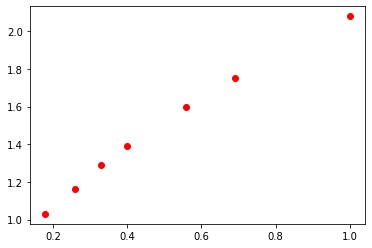

In [2]:
l = np.array([0.33,0.56,0.18,0.26,0.69,0.40,1.00])#Stocke les valeurs de logueur du fil
p = np.array([1.29,1.60,1.03,1.16,1.75,1.39,2.08]) #Stocke les valeurs de période des oscillations
plt.plot(l,p, 'ro')

 - Créer deux variables  **x** et **y** pour définir les grandeurs à porter en abscisse et en ordonnée.

In [3]:
x = p**2
y = 4*np.pi**2*(l+0.075)

### Régression linéaire sans incertitudes
---

- Réaliser la régression linéaire sur les grandeurs **x** et **y**.   
> On utilise l'instruction   
>
>  **np.polyfit(<*grandeur_en_abscisse*>, <*grandeur_en_ordonnée*>, <*degré_polynôme*>)**      
>
>qui calcule les coefficients du polynôme qui s'ajuste le mieux aux données.   

Dans le cas d'une régression linéaire, il s'agit d'ajuster un polynôme de degré 1 aux données. L'instruction renvoie les valeurs des coeeficients du polynôme, soit la pente et l'ordonnée à l'origine dans le cas d'une droite correspondant à un polynôme de degré 1.

In [4]:
pente, ordonnee = np.polyfit(x, y, 1) # Remplacer <grandeur_en_abscisse>, <grandeur_en_ordonnée>, <degré_polynôme> par les expressions ou valeurs convenables.
reg = pente,ordonnee
yreg = reg[0]*x+reg[1]

- Ecrire deux lignes de code permettant d'afficher les valeurs de la pente et de l'ordonnée à l'origine de la régression linéaire. 

In [5]:
print(pente, ordonnee)

9.909953929173527 -0.33389480677348743


 - Représenter graphiquement **y** en fonction de **x** comme des ronds bleus. Superposer sur le même graphe la droite de régression linéaire d'équation *y* = *ordonnee* + *pente* * *x* , représentée comme une ligne rouge.   
 Donner un titre au graphique.   
 Nommer les axes.   
 Légender le graphe.

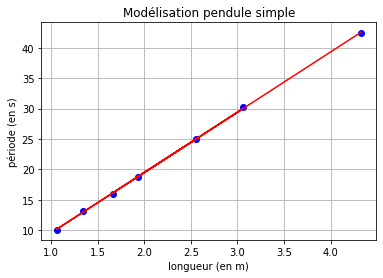

In [6]:
plt.plot(x,y,' bo')
plt.plot(x,yreg,'r')
plt.xlabel('longueur (en m)')
plt.ylabel('période (en s)')
plt.title('Modélisation pendule simple')
plt.grid()
plt.show()

### Prise en compte des incertitudes sur les données expérimentales 
---
- Estimer la précision sur les deux  grandeurs mesurées. Affecter ces valeurs à deux variables.   
- En déduire les incertitudes correspondantes. Affecter les valeurs à deux variables. On rappelle que pour une grandeur connue avec une précision $ \Delta $, l'incertitude *u* correspondante vaut $u = \frac{\Delta}{\sqrt 3}$.

In [7]:
pl = 0.01
pp = 0.1
incl = pl/(3)**(1/2)
incp = pp/(3)**(1/2)
print('Incertitude longueur =',incl,'m. Incertitude période',incp,'s')

Incertitude longueur = 0.005773502691896258 m. Incertitude période 0.05773502691896258 s


 - Calculer les incertitudes sur les grandeurs **x** et **y**. Affecter les valeurs à deux variables. On rappelle les formules de propagation des incertitudes :   
>pour une grandeur $W = k Z$, $k$ = cste, $u(W) = |k|\times u(Z)$    
pour une grandeur $W = S \times Z$ , $u(W) = |W| \sqrt{\left( \frac{u(S)}S  \right)^2 +\left( \frac{u(Z)}Z  \right)^2 }$

In [8]:
Wx = (p**2)/(3**(1/2)) #Incertitude de x = 1*p**2
Wy = (4*np.pi**2)*((l+0.075)/(3**(1/2))) #Incertitude de y = 4*np.pi**2*(l+0.075)
print(Wx,Wy)

[0.96076858 1.47801669 0.6125109  0.77688252 1.7681352  1.11549846
 2.4978482 ] [ 9.23111439 14.47347564  5.81218313  7.63561314 17.4365494  10.82661564
 24.50234066]


### Simulation Monte Carlo de *N* = 10000 régressions linéaires
---

In [9]:
N = 10000   # Remplacer <valeur>

 - Créer deux listes vides **Pente** et **Ordo** pour stocker les valeurs des pentes et des ordonnées à l'origine des *N* régressions linéaires simulées.   
 - Créer une variable **L** qui contient le nombre d'expériences réalisées

In [14]:
Pente = []
Ordo = []
L = N

 - Simulation Monte Carlo :   

In [43]:
for i in range(N):
  longueur = np.random.uniform(pente-incl, pente+incl, L)  # Remplacer <expression> : simuler une liste de L valeurs de longueur du pendule selon une loi uniforme
  période = np.random.uniform(ordonnee-incp, ordonnee+incp, L)      # Remplacer <expression> : simuler une liste de L valeurs d'oscillations du pendule selon une loi uniforme
  Y = longueur          # Remplacer <expression> par la grandeur à porter en ordonnée
  X = période          # Remplacer <expression> par la grandeur à porter en abscisse

  regression = np.polyfit(X, Y, 1) # Réalise la régression linéaire sur les données simulées

  Pente.append(regression[0])      
  Ordo.append(regression[1])

 - Calculer l'incertitude **u_pente** sur la pente de la régression linéaire sur les grandeurs expérimentales à partir de l'échantillon des *N* valeurs simulées de pente.   
 - Calculer l'incertitude **u_ordo** sur l'ordonnée à l'origine de la régression linéaire sur les grandeurs expérimentales à partir de l'échantillon des *N* valeurs simulées d'ordonnée à l'origine.

In [44]:
u_pente = X/(3**(1/2))
u_ordo = Y/(3**(1/2))

- Ecrire deux lignes de code permettant d'afficher les valeurs des incertitudes sur la pente et l'ordonnée à l'origine de la régression linéaire sur les données expérimentales. 

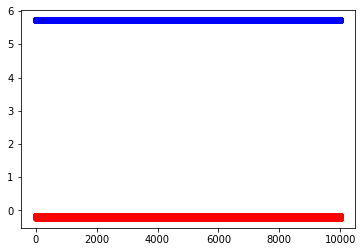

In [45]:
plt.plot(u_pente, 'ro')
plt.plot(u_ordo, 'bo')

### Représentation graphique tenant compte des incertitudes
---

- Représenter graphiquement les données expérimentales assorties de leurs barres d'incertitude. On représentera les données par des croix bleues.   
> On utilise l'instruction    
>   
> **plt.errorbar(<*grandeur en abscisse*>,<*grandeur en ordonnée*>, xerr = <*incertitude sur la grandeur en abscisse*>, yerr = <*incertitude sur la grandeur en ordonnée*> , fmt = '*couleur marqueur*'  )**     

- Superposer sur le même graphe la droite de régression linéaire d'équation *y* = *ordonnee* + *pente* * *x* , représentée comme une ligne rouge.   
 Donner un titre au graphique.   
 Nommer les axes.   
 Légender le graphe.

ValueError: ignored

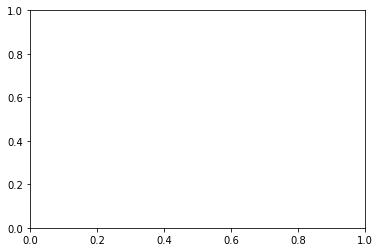

In [46]:
plt.errorbar(x, yreg, xerr = u_pente, yerr = u_ordo , fmt = 'bx' )
plt.plot(x,yreg,'r')
plt.xlabel('longueur (en m)')
plt.ylabel('période (en s)')
plt.title('Modélisation pendule simple')
plt.grid()
plt.show()